<a href="https://colab.research.google.com/github/DhamuSniper/Satellite-Wild-fire-High-altitude-red-Image-Analysis-using-Numpy/blob/master/Satellite_Wild_fire(High_altitude%3Dred)_Image_Analysis_using_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Satellite Image Data 


Analysis using numpy


Data Source: Satellite Image from WIFIRE Project

WIFIRE is an integrated system for wildfire analysis, with specific regard to changing urban dynamics and climate. The system integrates networked observations such as heterogeneous satellite data and real-time remote sensor data, with computational techniques in signal processing, visualization, modeling, and data assimilation to provide a scalable method to monitor such phenomena as weather patterns that can help predict a wildfire's rate of spread. 

In [0]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
%matplotlib inline 
from scipy import misc


In [4]:
from google.colab import files
train_upload=files.upload()

Saving sd-3layers.jpg to sd-3layers (1).jpg


Choose Image and Display its type

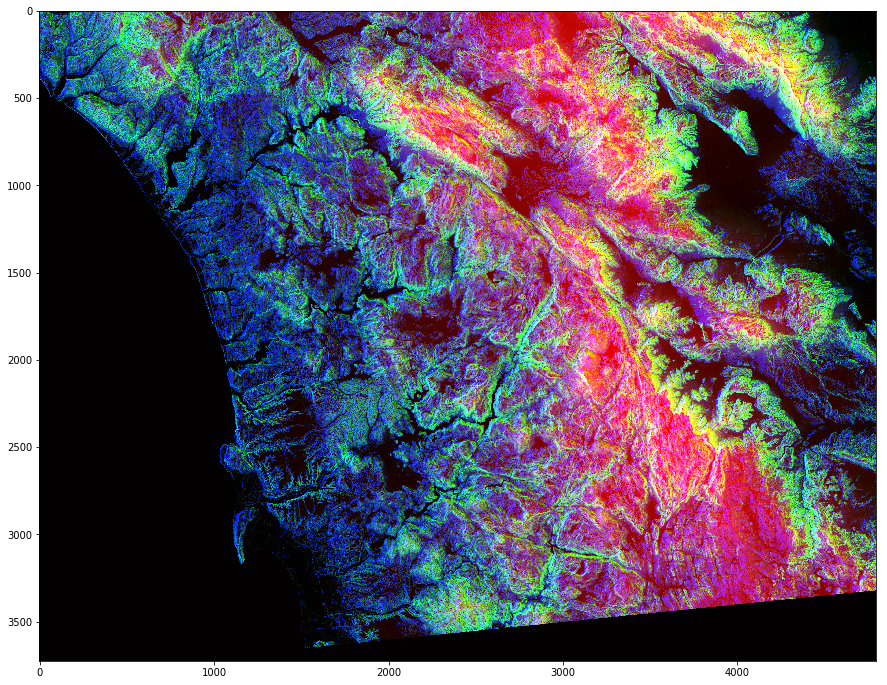

In [5]:
from skimage import data
photo_data=imageio.imread('sd-3layers.jpg')
type(photo_data)
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

In [8]:
photo_data.shape
photo_data.min()
photo_data.max()
photo_data.mean()
# run in separate cells

75.8299354508947

Pick all pixels with low values

In [10]:
low_value_filter=photo_data<200
print("low value",low_value_filter.shape)
print("phot_data",photo_data.shape)

low value (3725, 4797, 3)
phot_data (3725, 4797, 3)


Filter out low values

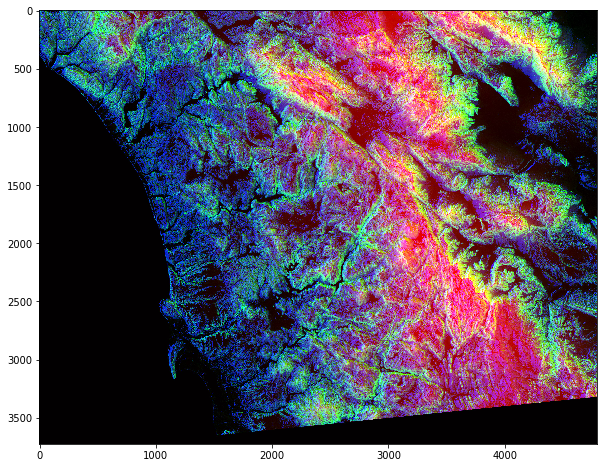

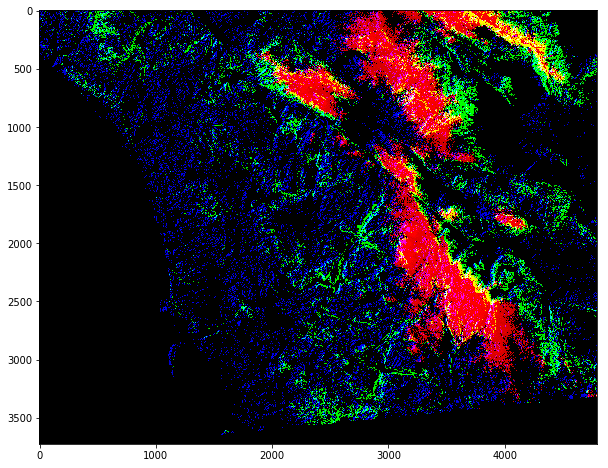

In [11]:
plt.figure(figsize=(10,10))
plt.imshow(photo_data)
photo_data[low_value_filter]=0
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

We can design complex patterns by making cols a function of rows(or) viceversa

In [17]:
photo_data=imageio.imread('sd-3layers.jpg')
rows_range=np.arange(len(photo_data))
cols_range=rows_range
print(type(rows_range))

<class 'numpy.ndarray'>


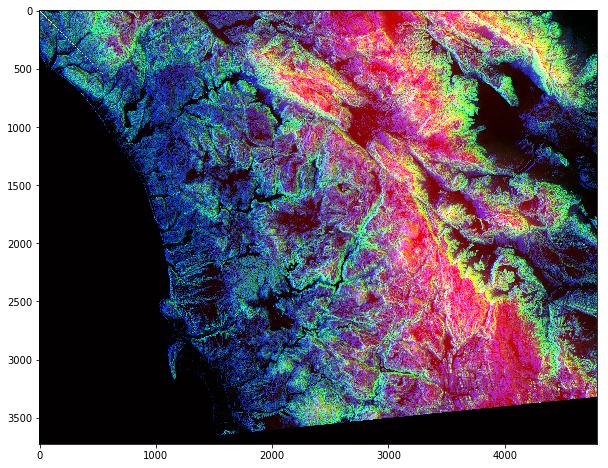

In [18]:


photo_data[rows_range,cols_range]=255
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

Note:
MASKING OF IMAGE

To calculated distance from center : (total number 0f rows-center_row)**2+(total number of columns-center_col)**2


Radius: 
             (total_rows/2)**2

In [20]:
total_rows,total_cols,total_layers=photo_data.shape
print(total_rows,total_cols,total_layers)

3725 4797 3


In [30]:
X,Y=np.ogrid[:total_rows,:total_cols]
center_row,center_col=total_rows/2,total_cols/2
dist_from_center=(X-center_row)**2+(Y-center_col)**2
radius=(total_rows/2)**2
circular_mask=dist_from_center>radius
print(circular_mask)
print(circular_mask[1500:1700,2000:2200])

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


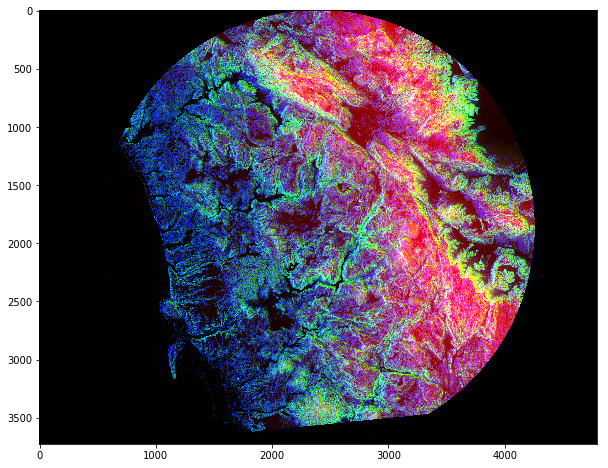

In [33]:
photo_data=imageio.imread('sd-3layers.jpg')
photo_data[circular_mask]=0
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

Further processing of our satellite imagery to find high altitude region


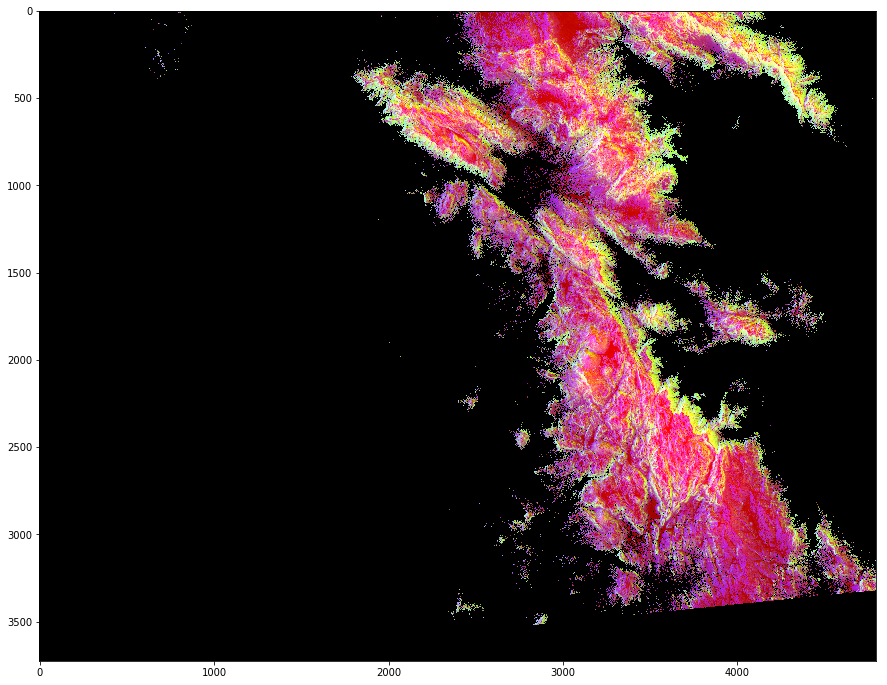

In [37]:
photo_data=imageio.imread('sd-3layers.jpg')
red_mask=photo_data[:,:,0]<150
photo_data[red_mask]=0
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

Composite mask that take threshold on all three layers

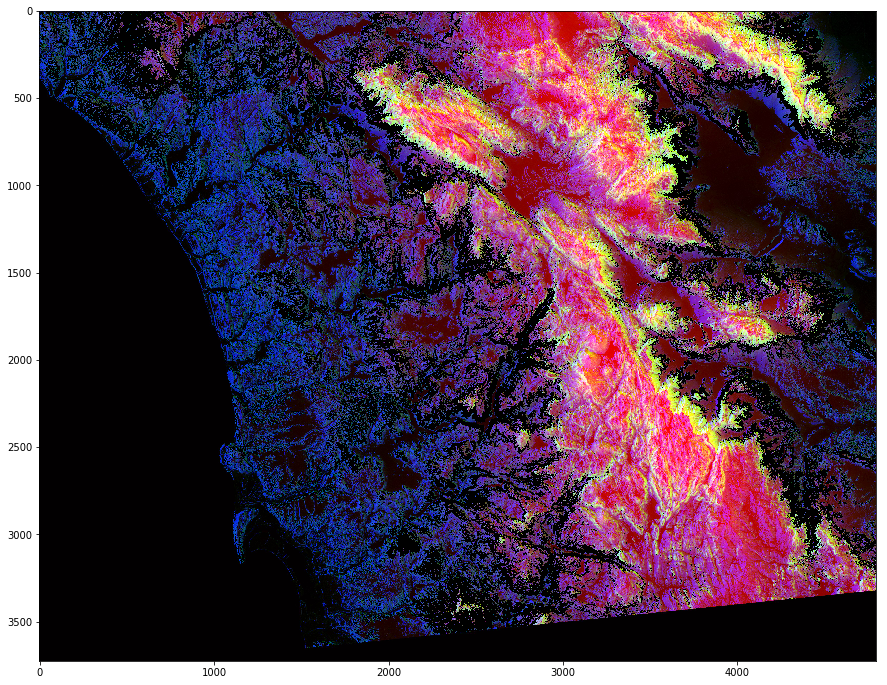

In [46]:
photo_data=imageio.imread('sd-3layers.jpg')

red_mask=photo_data[:,:,0]<150
green_mask=photo_data[:,:,1]>100
blue_mask=photo_data[:,:,2]<150

full_mask=np.logical_and(red_mask,green_mask,blue_mask)

photo_data[full_mask]=0

plt.figure(figsize=(15,15))
plt.imshow(photo_data)
